In [95]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [96]:
#Import iris dataset
glass = fetch_openml(name='glass')

C:\Users\aj\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:305: UserWarning: Multiple active versions of the dataset matching the name glass exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [97]:
print(glass)

{'data': array([[ 1.51793, 12.79   ,  3.5    , ...,  8.77   ,  0.     ,  0.     ],
       [ 1.51643, 12.16   ,  3.52   , ...,  8.53   ,  0.     ,  0.     ],
       [ 1.51793, 13.21   ,  3.48   , ...,  8.43   ,  0.     ,  0.     ],
       ...,
       [ 1.51613, 13.92   ,  3.52   , ...,  7.94   ,  0.     ,  0.14   ],
       [ 1.51689, 12.67   ,  2.88   , ...,  8.54   ,  0.     ,  0.     ],
       [ 1.51852, 14.09   ,  2.19   , ...,  9.32   ,  0.     ,  0.     ]]), 'target': array(['build wind float', 'vehic wind float', 'build wind float',
       'tableware', 'build wind non-float', 'build wind non-float',
       'vehic wind float', 'build wind float', 'headlamps',
       'build wind non-float', 'build wind non-float',
       'build wind non-float', 'build wind float', 'vehic wind float',
       'vehic wind float', 'build wind non-float', 'headlamps',
       'build wind non-float', 'containers', 'build wind non-float',
       'build wind float', 'build wind non-float', 'build wind non-fl

In [98]:
# Have a look at the dataset
print(glass.target)

['build wind float' 'vehic wind float' 'build wind float' 'tableware'
 'build wind non-float' 'build wind non-float' 'vehic wind float'
 'build wind float' 'headlamps' 'build wind non-float'
 'build wind non-float' 'build wind non-float' 'build wind float'
 'vehic wind float' 'vehic wind float' 'build wind non-float' 'headlamps'
 'build wind non-float' 'containers' 'build wind non-float'
 'build wind float' 'build wind non-float' 'build wind non-float'
 'build wind float' 'containers' 'build wind non-float'
 'build wind non-float' 'headlamps' 'build wind non-float'
 'vehic wind float' 'build wind non-float' 'vehic wind float' 'tableware'
 'build wind non-float' 'build wind float' 'build wind float'
 'build wind float' 'build wind non-float' 'build wind non-float'
 'build wind non-float' 'build wind float' 'build wind non-float'
 'build wind non-float' 'build wind non-float' 'vehic wind float'
 'build wind float' 'containers' 'build wind float' 'build wind float'
 'build wind non-float'

In [99]:
# Dataset URL
glass.url

'https://www.openml.org/d/41'

In [100]:
# Non graphical EDA
glass.data.shape

(214, 9)

In [101]:
# Non graphical EDA
glass.target.shape

(214,)

In [102]:
# Non graphical EDA
np.unique(glass.target)

array(['build wind float', 'build wind non-float', 'containers',
       'headlamps', 'tableware', 'vehic wind float'], dtype=object)

In [103]:
# Non graphical EDA
glass.DESCR

'**Author**: B. German  \n**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/glass+identification) - 1987-09-01  \n**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  \n\n1. Title: Glass Identification Database\n \n 2. Sources:\n     (a) Creator: B. German\n         -- Central Research Establishment\n            Home Office Forensic Science Service\n            Aldermaston, Reading, Berkshire RG7 4PN\n     (b) Donor: Vina Spiehler, Ph.D., DABFT\n                Diagnostic Products Corporation\n                (213) 776-0180 (ext 3014)\n     (c) Date: September, 1987\n \n 3. Past Usage:\n     -- Rule Induction in Forensic Science\n        -- Ian W. Evett and Ernest J. Spiehler\n        -- Central Research Establishment\n           Home Office Forensic Science Service\n           Aldermaston, Reading, Berkshire RG7 4PN\n        -- Unknown technical note number (sorry, not listed here)\n        -- General Results:

In [104]:
# Non graphical EDA
glass.details

{'id': '41',
 'name': 'glass',
 'version': '1',
 'format': 'ARFF',
 'creator': 'B. German',
 'collection_date': '1987-09-01',
 'upload_date': '2014-04-06T23:22:26',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/41/glass.arff',
 'file_id': '41',
 'default_target_attribute': 'Type',
 'version_label': '1',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': ['study_1', 'study_41', 'study_7', 'study_76', 'study_88', 'uci'],
 'visibility': 'public',
 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/glass+identification',
 'paper_url': 'https://dl.acm.org/doi/abs/10.5555/67040.67055',
 'status': 'active',
 'processing_date': '2020-11-20 20:02:43',
 'md5_checksum': 'd38f2d5484e30ec447bbd8b6d3354460'}

In [105]:
# Converting dataset from numpy array to pandas dataframe
x = pd.DataFrame(data=glass.data, 
                 index=np.array(range(1, 215)), 
                 columns=np.array(range(1, 10)))
x.head()

,1,2,3,4,5,6,7,8,9
1,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00
2,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00
3,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
4,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00
5,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24


In [106]:
# Converting dataset from numpy array to pandas dataframe
y = pd.DataFrame(data=glass.target, 
                 index=np.array(range(1, 215)),
                 columns=np.array(range(1, 2)))
y.head()

,1
1,build wind float
2,vehic wind float
3,build wind float
4,tableware
5,build wind non-float


In [107]:
# Convering target class into numerical form
y[1] = y[1].replace(['build wind float', 'build wind non-float', 
                     'containers', 'tableware', 'headlamps', 
                     'vehic wind float'], [0,1,2,3,4,5])

In [108]:
y  = y.apply(pd.to_numeric)
type(y.iloc[0,0])

numpy.int64

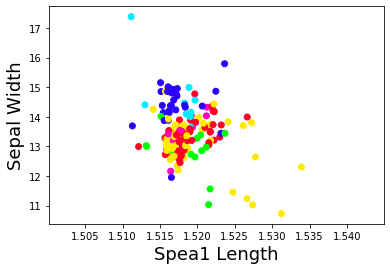

In [109]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

In [110]:
db = DBSCAN(eps=0.3)
db.fit(x)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [111]:
db.labels_

array([ 0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  2,  0,  2, -1, -1,  1,
        0,  2,  2, -1,  2, -1,  0, -1,  2, -1, -1,  0, -1,  0,  0,  0,  0,
        0, -1,  2, -1, -1, -1, -1, -1,  3, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1,  3, -1,  3, -1,  1,  0, -1,  0,  0,  0, -1, -1,  0, -1,
       -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  2,  2, -1,  0, -1, -1,
       -1,  2, -1,  2,  0, -1, -1, -1,  2, -1, -1, -1, -1,  3, -1, -1, -1,
        0,  0,  0, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  2,  1, -1, -1,  0, -1,  0,
       -1,  0, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  2,  1, -1, -1,  0,
       -1,  0, -1, -1,  0,  0, -1, -1, -1, -1], dtype=int64)

In [112]:
pred_result = pd.DataFrame(data=db.labels_,
          index=np.array(range(1, 215)),
          columns=np.array(range(1, 2)))

In [113]:
dbscan_silhouette = silhouette_score(x, 
                                     db.labels_).round (2)

In [114]:
dbscan_silhouette

-0.17

In [115]:
ari_dbscan = adjusted_rand_score(y.iloc[:,0], db.labels_)

In [116]:
ari_dbscan

-0.029060324005921765

In [117]:
f1_sc = f1_score(y, pred_result, average = 'macro')
print(f1_sc)

0.08970875637542304


C:\Users\aj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


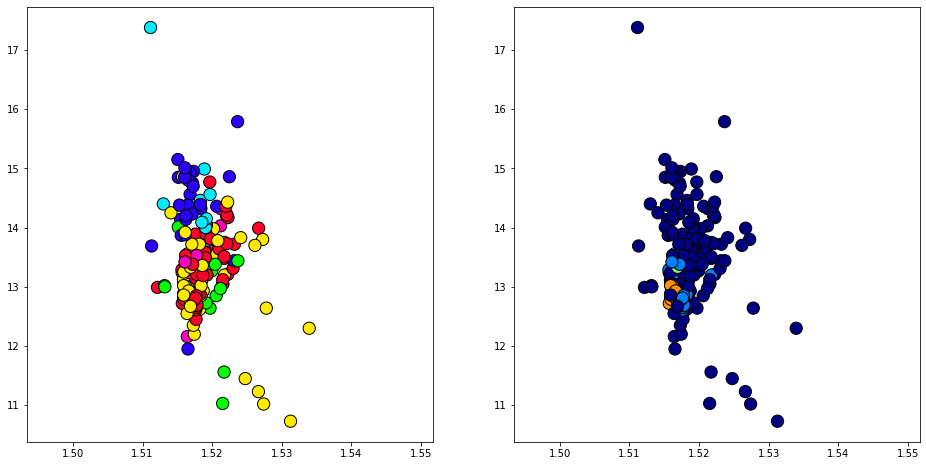

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x.iloc[:, 0], x.iloc[:, 1], c=y.iloc[:,0], cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(x.iloc[:, 0], x.iloc[:, 1], c=pred_result.iloc[:,0], cmap='jet',edgecolor='k', s=150)
plt.show()